<a href="https://colab.research.google.com/github/NMT201/CS114.L21/blob/NMT201-patch-1/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NHẬN DIỆN TIN CHÂM BIẾM QUA TIÊU ĐỀ CÁC BÀI BÁO :** 

### **Các thành viên trong nhóm** :
* Phạm Quang Vinh - 19522526
* Nguyễn Minh Trí - 19522389
* Trương Xuân Linh - 19521759


## **I. Import các thư viện cần thiết :**

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords, brown
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import plotly.graph_objs as go

## **II. Crawl dữ liệu :**

###**1. Crawl dữ liệu từ các trang châm biếm vào file 1.json:** 



* **The Betoota Advocate** - Canada : http://betootaadvocate.com/ (14961 headlines từ 1/1/2018 đến nay)

In [ ]:
for year in range(21, 22):
  for month in range(4,7):
    for day in range(1,32):
      paper = "https://www.betootaadvocate.com/20"+ str(year) + "/" + str(month) + "/" + str(day) + "/"
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('div', class_ = 'td-module-thumb')
      links = [link.find('a').attrs["href"] for link in titles]

      with open("/content/drive/MyDrive/ML/1_test.json", 'a') as f:
          for link in links:
              news = requests.get(link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "entry-title").text
              data = {
                      "article_link" : link,
                      "headline" : title,
                      "is_sarcastic" : 1
                  }
              json.dump(data, f)
              f.write("\n")


* **Clickhole** - U.S : https://clickhole.com/ (808 headlines từ 1/1/2018 đến nay)

In [ ]:
for year in range(18, 22):
  for month in range(1, 13):
    for page in range(1, 4):
      paper = "https://clickhole.com/"+ str(year) +"/"+ str(month) +"/page/"+str(page)+"/"
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('h2', class_ = 'post-title')
      links = [link.find('a').attrs["href"] for link in titles]

      with open("/content/drive/MyDrive/ML/1.json", 'a') as f:
          for link in links:
              news = requests.get(link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "post-title").text
              data = {
                      "article_link" : link,
                      "headline" : title,
                      "is_sarcastic" : 1
                  }
              json.dump(data, f)
              f.write("\n")

* **The Daily Bonnet** - Canada : https://dailybonnet.com/ (1486 headlines từ 1/1/2018 đến nay)

In [ ]:
for page in range(1, 85):
  for month in range(1,13):
    for day in range(1,32):
      paper = "https://dailybonnet.com/20" + str(year) +"/"+ str(month) + "/" + str(day) +"/"
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('h2', class_ = 'post-title')
      links = [link.find('a').attrs["href"] for link in titles]

      with open("/content/drive/MyDrive/ML/1.json", 'a') as f:
          for link in links:
              news = requests.get(link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "entry-title").text
              data = {
                      "article_link" : link,
                      "headline" : title,
                      "is_sarcastic" : 1
                  }
              json.dump(data, f)
              f.write("\n")

* **The Hard Times** - U.S : https://thehardtimes.net/ (6751 headlines từ 1/1/2018 đến nay)

In [ ]:
for year in range(18, 22):
  for month in range(1,13):
    for day in range(1,32):
    paper = "https://thehardtimes.net/20"+ str(year) +"/"+ str(month) + "/" + str(day) +"/"
    response = requests.get(paper)
    soup = BeautifulSoup(response.content, "html.parser")
    titles = soup.findAll('h3', class_ = 'entry-title mh-posts-list-title')
    links = [link.find('a').attrs["href"] for link in titles]

    with open("/content/drive/MyDrive/ML/1.json", 'a') as f:
        for link in links:
            news = requests.get(link)
            soup = BeautifulSoup(news.content, "html.parser")
            title = soup.find("h1", class_ = "entry-title").text
            data = {
                    "article_link" : link,
                    "headline" : title,
                    "is_sarcastic" : 1
                }
            json.dump(data, f)
            f.write("\n")

### **2. Crawl dữ liệu từ các trang chính thống vào file 0.json :**

* **Best in AU** : https://bestinau.com.au/

In [ ]:
for year in range(18, 22):
  for month in range(1, 13):
    for day in range(1, 32):
      paper = "https://bestinau.com.au/20"+ str(20) + "/" + str(month) + "/" + str(day) + "/"
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('h3', class_ = 'entry-title td-module-title')
      links = [link.find('a').attrs["href"] for link in titles]

      with open("/content/drive/MyDrive/ML/0.json", 'a') as f:
          for link in links:
              news = requests.get(link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "entry-title").text  
              data = {
                      "article_link" : link,
                      "headline" : title,
                      "is_sarcastic" : 0
                  }
              json.dump(data, f)
              f.write("\n")

* **TIME** : https://time.com/ (4354 headlines từ 1/1/2018 đến nay)

In [ ]:
for page in range(1, 765):
    try:
      paper = "https://time.com/section/world/?page=" + str(page)
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('h3', class_ = 'headline heading-3 heading-content-small padding-4-top margin-8-bottom media-heading')
      links = [link.find('a').attrs["href"] for link in titles]

      with open("/content/drive/MyDrive/ML/0.json", 'a') as f:
          for link in links:
              news = requests.get("https://time.com/" + link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "headline heading-content margin-8-top").text
              data = {
                      "article_link" : "https://time.com/" + link,
                      "headline" : title,
                      "is_sarcastic" : 0
                  }
              json.dump(data, f)
              f.write("\n")
    except:
      continue

 * **City News Everywhere** : https://toronto.citynews.ca/ (20533 headlines từ 1/1/2018 đến nay)

In [ ]:
for page in range(1, 1300):
    print(page)
    try:
      paper = "https://toronto.citynews.ca/category/national/page/"+ str(page) + "/"
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('div', class_ = 'col-lg-13 col-md-13 col-sm-13')
      links = [link.find('a').attrs["href"] for link in titles]
      
      with open("/content/drive/MyDrive/ML/0.json", 'a') as f:
          for link in links:
              news = requests.get(link)
              soup = BeautifulSoup(news.content, "html.parser")
              title = soup.find("h1", class_ = "headline").text
              data = {
                      "article_link" : link,
                      "headline" : title,
                      "is_sarcastic" : 0
                  }
              json.dump(data, f)
              f.write("\n")
    except:
      continue

### **3. Gộp 2 file vừa crawl được :**

* **File các headlines báo chính thống **

In [7]:
data0 = pd.read_json('/content/drive/MyDrive/ML/Sarcasm_data/0.json', lines = True)
data0

,article_link,headline,is_sarcastic
0,https://toronto.citynews.ca/2021/06/11/a-look-...,A look at COVID-19 vaccinations in Canada on F...,0
1,https://toronto.citynews.ca/2021/06/11/the-lat...,The latest numbers on COVID-19 in Canada for F...,0
2,https://toronto.citynews.ca/2021/06/11/b-c-pre...,B.C. premier says changes to U.S. cruise ship ...,0
3,https://toronto.citynews.ca/2021/06/11/peoples...,People's Party leader Maxime Bernier charged a...,0
4,https://toronto.citynews.ca/2021/06/11/peoples...,People's Party of Canada Leader Maxime Bernier...,0
...,...,...,...
58851,https://bestinau.com.au/dan-murphy-catalogue/,A look into the Dan Murphy Catalogue and how i...,0
58852,https://bestinau.com.au/neurologists-adelaide/,Best Neurologists in Adelaide,0
58853,https://bestinau.com.au/establish-website-high...,Establishing if your website is high in qualit...,0
58854,https://bestinau.com.au/everything-to-know-abo...,Everything to know about Taylor Swift’s new al...,0


In [8]:
data0 = data0.drop_duplicates()

* **File các headlines báo châm biếm**

In [9]:
data1 = pd.read_json('/content/drive/MyDrive/ML/Sarcasm_data/1.json', lines= True)
data1

,article_link,headline,is_sarcastic
0,https://clickhole.com/finally-the-indians-are-...,Finally: The Indians Are Replacing Their Racis...,1
1,https://clickhole.com/end-of-an-era-with-donal...,End Of An Era: With Donald Trump’s Plans To Se...,1
2,https://clickhole.com/culture-shock-everything...,Culture Shock: Everything You Need To Know Abo...,1
3,https://clickhole.com/bridging-the-divide-chri...,Bridging The Divide: Christian And Muslim Show...,1
4,https://clickhole.com/we-get-it-you-re-here-a-...,"We Get It, You’re Here A Lot: This Guy’s Girlf...",1
...,...,...,...
24002,https://www.betootaadvocate.com/uncategorized/...,Local Mature-Age Student Adds Another Valuable...,1
24003,https://www.betootaadvocate.com/uncategorized/...,Local Woman Transitions Into Late 30s By Makin...,1
24004,https://www.betootaadvocate.com/uncategorized/...,Report: NRL Mole Definitely Should Have Said S...,1
24005,https://toronto.citynews.ca/2021/06/11/a-look-...,A look at COVID-19 vaccinations in Canada on F...,1


In [10]:
data1 = data1.drop_duplicates()

* **Gộp 2 file**

In [11]:
data = data1.append(data0)

* **Shuffle dữ liệu**

In [12]:
data = data.sample(frac=1).reset_index(drop=True)
data

,article_link,headline,is_sarcastic
0,https://toronto.citynews.ca/2020/03/12/stock-m...,Worst day on Wall Street since 1987 as virus f...,0
1,https://www.betootaadvocate.com/headlines/if-y...,“If You’re Worried About This Jab We Don’t Hav...,1
2,https://toronto.citynews.ca/2019/09/09/former-...,Former justice Marie Deschamps named to panel ...,0
3,https://toronto.citynews.ca/2018/12/20/nafta-d...,NAFTA drama earns Chrystia Freeland CP's Busin...,0
4,https://toronto.citynews.ca/2018/12/12/canada-...,"If courts decide to extradite Huawei exec, jus...",0
...,...,...,...
45350,https://toronto.citynews.ca/2020/08/31/trade-m...,Trade minister says she'll keep eye on U.S. pr...,0
45351,https://toronto.citynews.ca/2019/10/08/climate...,Climate protesters shut down bridges in Canadi...,0
45352,https://www.betootaadvocate.com/breaking-news/...,Barilaro: “Gladys Is Out Of Touch With Average...,1
45353,https://toronto.citynews.ca/2020/02/19/opposit...,Opposition promises new info on Trans Mountain...,0


###**Nhận xét :**
* Thu thập được tổng cộng 24005 tiêu đề báo châm biếm, 58855 tiêu đề báo chính thống
* Số lượng báo chính thống gấp hơn 2 lần so với báo châm biếm 
* Chênh lệch dữ liệu này có thể dẫn đến sai lệch độ chính xác của model 

## **III. Tiền xử lý dữ liệu :**

In [13]:
X = data["headline"].values
y = data["is_sarcastic"].values

### **1. Tạo vocalbulary theo data đã thu thập :**

In [ ]:
stop_words = set(stopwords.words('english')) # Vd: a, an ,is ,...

In [19]:
# tập các từ tiếng Anh của thư viện nltk
corpora_nltk = brown.words(categories='news')

In [20]:

def preprocessing(text): # Loại bỏ các kí tự không phải alphabet, chuyển sang chữ thường, loại bỏ các stop word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in text]
  words = [word for word in stripped if word.isalpha()]

  words = [w for w in words if not w in stop_words]

  vocabulary = [w.lower() for w in words]
  vocabulary = list(dict.fromkeys(vocabulary))
  return vocabulary

In [21]:
corpora_nltk = preprocessing(corpora_nltk)
print(corpora_nltk)

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlantas', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place', 'termend', 'presentments', 'city', 'executive', 'committee', 'overall', 'charge', 'deserves', 'praise', 'thanks', 'atlanta', 'manner', 'conducted', 'septemberoctober', 'term', 'charged', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'hardfought', 'mayornominate', 'ivan', 'allen', 'jr', 'only', 'relative', 'handful', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'find', 'many', 'georgias', 'registration', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous', 'it', 'recommended', 'legislators', 'act', 'studied', 'revised', 'end', 'modernizing', 'improving', 'commented', 'topics', 'among', 'purchasing', 'departments', 'well', 'operated', 'follow', 'generally', 'accepted', 'practices', 'inure', 'best', 'governments', 'merger', 'propo

### **2. Chia train, test :**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [26]:
print("X_train size : " + str(X_train.shape))
print("X_test size : " + str(X_test.shape))

X_train size : (34016,)
X_test size : (11339,)


### **3. Dùng CountVectorizer để vectorize (đếm số lần xuất hiện) :**


* Hàm trả về ma trận scipy.sparse.csr.csr_matrix lưu trữ vị trí của từ đó trong từ điển và số lần xuất hiện trong câu :

In [27]:
vectorizer_CV = CountVectorizer(stop_words = stop_words, vocabulary = corpora_nltk, strip_accents = 'ascii')
vectorizer_CV.fit(X_train)

X_train_CV = vectorizer_CV.transform(X_train)
X_test_CV  = vectorizer_CV.transform(X_test)
print(X_train_CV.shape)

(34016, 12085)


### **4. Dùng TF-IDF:**

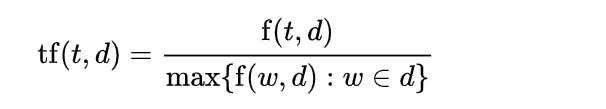

Trong đó :
* tf(t, d) : tần suất xuất hiện của từ trong văn bản d
* f(t, d) : số lần xuất hiện của từ t trong văn bản d
* max({f(w, d) : w ∈ d}): số lần xuất hiện của từ có số lần xuất hiện nhiều nhất trong văn bản d

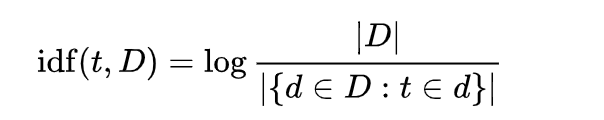

Trong đó:
* idf(t, D): giá trị của từ t trong tập văn bản D
* |D|: Tổng số văn bản trong tập D
* |{d ∈ D : t ∈ d}|: thể hiện số văn bản trong tập D có chứa từ t

In [28]:
vectorizer_TF = TfidfVectorizer(stop_words = stop_words, vocabulary = corpora_nltk, strip_accents = 'ascii')
vectorizer_TF.fit(X_train)

X_train_TF = vectorizer_TF.transform(X_train)
X_test_TF  = vectorizer_TF.transform(X_test)
print(X_train_TF.shape)

(34016, 12085)


## **IV. Train model:**

* Chúng em sử dụng nhiều thuật toán máy học khác nhau cho bài toán phân lớp này để có thể chọn được thuật toán có accuracy cao nhất.

### **1. Support vector machine (SVM)**

In [29]:
classifier_SVM_CV = LinearSVC().fit(X_train_CV, y_train)
score_SVM_CV = classifier_SVM_CV.score(X_test_CV, y_test)

In [30]:
classifier_SVM_TF = LinearSVC().fit(X_train_TF, y_train)
score_SVM_TF = classifier_SVM_TF.score(X_test_TF, y_test)

### **2. Logistic Regression**

In [31]:
classifier_LR_CV = LogisticRegression().fit(X_train_CV, y_train)
score_LR_CV = classifier_LR_CV.score(X_test_CV, y_test)

In [32]:
classifier_LR_TF = LogisticRegression().fit(X_train_TF, y_train)
score_LR_TF = classifier_LR_TF.score(X_test_TF, y_test)

### **3. Ridge classifier**

In [33]:
classifier_RR_CV = RidgeClassifier().fit(X_train_CV, y_train)
score_RR_CV = classifier_RR_CV.score(X_test_CV, y_test)

In [34]:
classifier_RR_TF = RidgeClassifier().fit(X_train_TF, y_train)
score_RR_TF= classifier_RR_TF.score(X_test_TF, y_test)

### **4. SGD classifier:**

In [35]:
classifier_SGD_CV = SGDClassifier().fit(X_train_CV, y_train)
score_SGD_CV = classifier_SGD_CV.score(X_test_CV, y_test)

In [36]:
classifier_SGD_TF = SGDClassifier().fit(X_train_TF, y_train)
score_SGD_TF = classifier_SGD_TF.score(X_test_TF, y_test)

### **5. K-Neighbors Classifier**

In [37]:
classifier_KNC_CV = KNeighborsClassifier(n_neighbors=2)
classifier_KNC_CV.fit(X_train_CV, y_train)
score_KNC_CV = classifier_KNC_CV.score(X_test_CV, y_test)

In [38]:
classifier_KNC_TF = KNeighborsClassifier(n_neighbors=2)
classifier_KNC_TF.fit(X_train_TF, y_train)
score_KNC_TF = classifier_KNC_TF.score(X_test_TF, y_test)

### **6. So sánh các model với bộ dữ liệu train test chia ra từ 6 trang thu thập được**

Running Linear SVM
[0.84979424 0.8462669  0.8409759  0.85390947 0.84244562 0.83862434
 0.84886798 0.85445457 0.84269333 0.84210526]
Running Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[0.85243974 0.86125808 0.84068195 0.85626102 0.8547913  0.85920047
 0.85651279 0.86856807 0.84563364 0.86386357]
Running K-Nearest Neighbors
[0.69958848 0.68606702 0.67695473 0.67548501 0.68371546 0.67283951
 0.67186122 0.69420759 0.68656278 0.66950897]
Running SGD Classifier
[0.84861846 0.8633157  0.85008818 0.84303351 0.85655497 0.84567901
 0.85680682 0.8594531  0.85357248 0.85768892]
Running Rigde Classifier
[0.84773663 0.84479718 0.85449735 0.83686067 0.84567901 0.85302763
 0.8415172  0.84445751 0.84445751 0.84592767]


Text(0, 0.5, 'Accuracy')

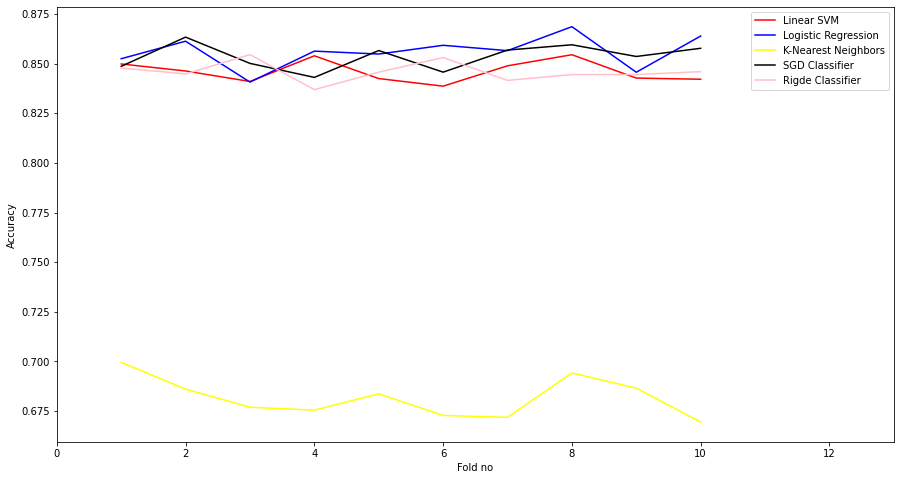

In [39]:
X = X_train_CV.copy()
Y = y_train.copy()
classifier_names = ['Linear SVM',
                    'Logistic Regression',
                    'K-Nearest Neighbors',
                    'SGD Classifier',
                    "Rigde Classifier"]


classifiers = [LinearSVC(),
               LogisticRegression(),
               KNeighborsClassifier(2),
               SGDClassifier(),
               RidgeClassifier()]
plot_data=[]
name=[]
times = [1,2,3,4,5,6,7,8,9,10]
colors = ['red','blue','yellow','black', 'pink']
clf_data=zip(classifier_names, classifiers, colors)
plt.figure(figsize= (15,8))
for clf_name, clf, cl in clf_data:
    print('Running '+clf_name)
    kf=StratifiedKFold(n_splits=10, shuffle=True)
    scores=cross_val_score(clf, X, Y, cv=kf)
    print(scores)
    plt.plot(times,scores, color = cl, markersize = 10)
    name.append(clf_name)
    plot_data.append(
        go.Scatter(
            x=[i+1 for i in range(10)],
            y=scores,
            mode='lines',
            name=clf_name
        )
    )
plt.xlim(0,13)
plt.legend(name, loc = 'upper right')

plt.xlabel('Fold no')
plt.ylabel('Accuracy')

### **7. Nhận xét :**
* Hầu hết các model đều cho được accuracy >= 0.85, chỉ riêng K-Neighbors thấp hơn rất nhiều nên sẽ không sử dụng để predict.
* Các model đều cho thấy accuracy của dữ liệu khi xử lý bằng CountVectorizer và TF-IDF Vectorizer đều tương đương nhau.

## **V. Predict model với 2 trang khác :**

### **1. Crawl dữ liệu từ 2 trang khác 6 trang đã train dể predict model:**

**Báo châm biếm :**
* The Burrad Street Journal - Canada: https://www.burrardstreetjournal.com/

In [ ]:
for year in range(18, 22):
  for month in range(1,13):
    paper = "https://www.burrardstreetjournal.com/20"+ str(year) +"/" + str(month) +"/"
    response = requests.get(paper)
    soup = BeautifulSoup(response.content, "html.parser")
    titles = soup.findAll('h3', class_ = 'entry-title td-module-title')
    links = [link.find('a').attrs["href"] for link in titles]

    with open("/content/drive/MyDrive/ML/Sarcasm_data/1_test.json", 'a') as f:
        for link in links:
            news = requests.get(link)
            soup = BeautifulSoup(news.content, "html.parser")
            title = soup.find("h1", class_ = "entry-title").text
            data = {
                    "article_link" : link,
                    "headline" : title,
                    "is_sarcastic" : 1
                }
            json.dump(data, f)
            f.write("\n")
    print(str(month) + "/" + str(year))

In [50]:
d1 = pd.read_json("/content/drive/MyDrive/ML/Sarcasm_data/1_test.json", lines = True)
d1

,article_link,headline,is_sarcastic
0,https://www.burrardstreetjournal.com/cristiano...,BREAKING: Cristiano Ronaldo Charged With Sexua...,1
1,https://www.burrardstreetjournal.com/sanchez-m...,‘Sanchez Move To Be Completed In Next Few Minu...,1
2,https://www.burrardstreetjournal.com/5-signs-y...,5 Signs You’re Secretly A Stable Genius,1
3,https://www.burrardstreetjournal.com/mayor-rob...,Mayor Robertson ‘Proud’ To Have Fulfilled Prom...,1
4,https://www.burrardstreetjournal.com/luis-suar...,Luis Suarez Claims Firmino Is ‘Completely Inno...,1
...,...,...,...
354,https://www.burrardstreetjournal.com/donald-tr...,Donald Trump Jr. Tests Positive For Being A Di...,1
355,https://www.burrardstreetjournal.com/kanye-dem...,"Refusing To Concede, Kanye Demands Full Recoun...",1
356,https://www.burrardstreetjournal.com/mancheste...,Man Utd Make Last-Minute Bid To Re-Sign Maroua...,1
357,https://www.burrardstreetjournal.com/trump-adv...,Trump Advised To Drink As Much Bleach As Possible,1


**Báo chính thống :**
* The euronews - English : https://www.euronews.com/

In [ ]:
for year in range(18,22):
  for month in range(1,13):
    for day in range(1,32):     
      paper = "https://www.euronews.com/20"+str(year)+"/"+str(month)+"/"+str(day)
      response = requests.get(paper)
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.findAll('h3', class_ = "m-object__title qa-article-title")
      links = [link.find('a').attrs["href"] for link in titles]
      for link in links:
        try:
          a = "https://www.euronews.com"
          news = requests.get(a + link)
          soup = BeautifulSoup(news.content, "html.parser")
          title = soup.find("h1", class_ = "c-article-title u-display-inline u-text-align--start").text
          data = {
          "article_link" : a + link,
          "headline" : title,
          "is_sarcastic" : 0
          }
          with open("/content/drive/MyDrive/ML/Sarcasm_data/0_test.json", 'a') as f:
            json.dump(data, f)
            f.write("\n")
        except:
          continue

In [43]:
d2 = pd.read_json('/content/drive/MyDrive/ML/Sarcasm_data/0_test.json', lines= True, encoding="utf-8-sig")
d2 = d2.drop_duplicates()
d2

,article_link,headline,is_sarcastic
0,https://www.euronews.com/2018/01/10/southern-e...,\n Southern EU leaders wrestle with migrati...,0
1,https://www.euronews.com/2018/01/10/ces-2018-p...,\n Power outage hits tech's biggest trade s...,0
2,https://www.euronews.com/2018/01/10/why-pay-ga...,\n Why the 'All the Money in the World' pay...,0
3,https://www.euronews.com/2018/01/10/memphis-pa...,\n Pastor admits to past 'sexual incident' ...,0
4,https://www.euronews.com/2018/01/10/santa-barb...,\n Santa Barbara shocked by loss of life in...,0
...,...,...,...
18898,https://www.euronews.com/2021/06/15/mps-in-hun...,\n MPs in Hungary back ban on sharing conte...,0
18899,https://www.euronews.com/2021/06/15/daniel-mor...,\n Daniel Morgan: 'Institutional corruption...,0
18900,https://www.euronews.com/2021/06/15/ikea-franc...,\n Ikea France fined €1 million for spying ...,0
18901,https://www.euronews.com/2021/06/15/eu-and-us-...,\n EU and US reach deal to end Airbus-Boein...,0


In [51]:
d_test = d1.append(d2)
d_test = d_test.sample(frac=1).reset_index(drop=True)
d_test

,article_link,headline,is_sarcastic
0,https://www.euronews.com/2018/08/12/manchester...,\n Manchester gunfight leaves children inju...,0
1,https://www.euronews.com/2020/12/18/it-makes-n...,\n 'It makes no sense': Russia's doping ban...,0
2,https://www.euronews.com/2018/07/01/judge-temp...,\n Judge temporarily blocks FEMA from endin...,0
3,https://www.euronews.com/2019/04/27/trieste-ma...,\n Trieste marathon excludes African runner...,0
4,https://www.euronews.com/2018/12/27/christmas-...,"\n Christmastime assault, possible robbery ...",0
...,...,...,...
19238,https://www.euronews.com/2020/07/31/who-are-th...,\n Who are the real winners and losers of t...,0
19239,https://www.euronews.com/2018/12/30/twin-nasa-...,\n Twin NASA probes cap 2018 & start 2019 w...,0
19240,https://www.euronews.com/2020/07/31/belarus-pr...,\n Belarus presidential elections: Meet the...,0
19241,https://www.euronews.com/2021/06/12/us-justice...,\n US: Justice probe after revelations Trum...,0


In [75]:
data = data.sample(frac=1).reset_index(drop=True)
data

,article_link,headline,is_sarcastic
0,https://bestinau.com.au/kim-kendall-and-kylie-...,"Kim, Kendall, and Kylie roasted over ongoing A...",0
1,https://toronto.citynews.ca/2018/12/16/quebece...,Quebecers criticize western oil but buying mor...,0
2,https://thehardtimes.net/music/ex-underoath-fa...,Ex-Underøath Fan Devoutly Tweets Death Threats...,1
3,https://www.betootaadvocate.com/uncategorized/...,"Now That Channel 9 Has Axed The Ellen Show, Ho...",1
4,https://toronto.citynews.ca/2021/05/27/moderna...,Moderna to ship 2M vaccine doses to Canada by ...,0
...,...,...,...
45350,https://thehardtimes.net/culture/someone-broke...,"“Someone Broke a Bottle Over There,” Warns Guy...",1
45351,https://www.betootaadvocate.com/uncategorized/...,Jesus Christ Confirms He Disowned Israel Folau...,1
45352,https://toronto.citynews.ca/2021/05/06/house-p...,House parties and other gatherings blamed for ...,0
45353,https://toronto.citynews.ca/2021/02/12/former-...,Former Obama adviser Podesta on Biden's Keysto...,0


In [78]:
X_train = data["headline"]
Y_train = data["is_sarcastic"]
print("X_train size : " + str(len(X_train)))

X_train size : 45355


In [79]:
X_test = d_test["headline"]
y_test = d_test["is_sarcastic"]
print("X_test size : " + str(len(X_test)))

X_test size : 19243


In [87]:
vectorizer_TF.fit(X_train)
X_train_TF = vectorizer_TF.transform(X_train)
X_train_TF

<45355x12085 sparse matrix of type '<class 'numpy.float64'>'
	with 242126 stored elements in Compressed Sparse Row format>

In [82]:
vectorizer_TF.fit(X_test)
X_test_TF = vectorizer_TF.transform(X_test)
X_test_TF

<19243x12085 sparse matrix of type '<class 'numpy.float64'>'
	with 100528 stored elements in Compressed Sparse Row format>

### **2. Visualize kết quả predict với data từ 2 trang khác :**


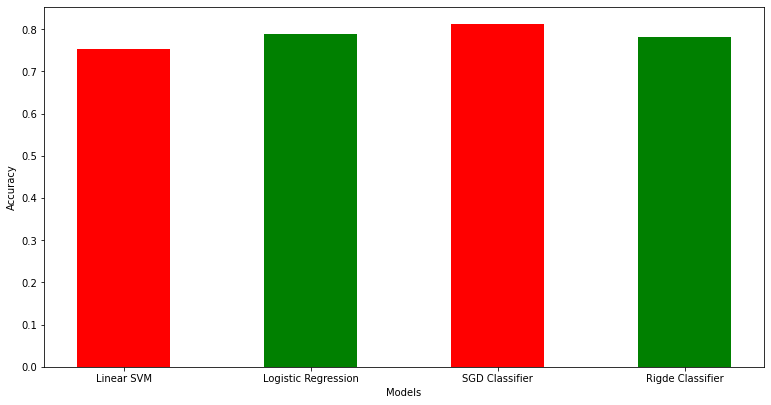

In [91]:
X = X_test_TF.copy()
Y = y_test.copy()
 
left = [1, 2, 3, 4]
  
scores = []
  
models = ['Linear SVM','Logistic Regression','SGD Classifier',"Rigde Classifier"]
classifiers = [classifier_SVM_CV, classifier_LR_CV, classifier_SGD_CV, classifier_RR_CV] 

clf_data=zip(classifier_names, classifiers)

for clf_name, clf in clf_data: 
  clf.fit(X_train_TF, Y_train)
  score = clf.score(X, Y)
  scores.append(score)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(left, height = scores, tick_label = models, width = 0.5, color = ['red', 'green'])
 
ax.set_xlabel('Models')

ax.set_ylabel('Accuracy')

plt.show()

## **VI. Nhận xét chung :**


1.   Về việc xây dựng với 6 trang đã thu thập từ trước, vì đây là bài toán Binary Classificationn nên các model mà nhóm chọn có kết quả tương đương nhau nhưng Logistic Regression có kết quả cao nhất (acc ~ 0.868), thấp nhất là K-Nearest Neighbors (acc ~ 0.669)
2.   Về việc xây dựng model với 6 bài báo cũ làm train và 2 bài báo mới làm test thì cũng cho kết quả thấp hơn 1 ít (-0.05) vì từ ngữ và văn phong của 2 bài báo mới có nhiều phần khác so với những bài báo cũ. Các model đều cho ra kết quả tương đương nhau với acc ~ 0.75 -> 0.8

